In [53]:
import sys
sys.path.append('../src/')

from benchmark.tools import *
from benchmark.models import Accuracy, Face, Box, Prediction, ImageFaces
from benchmark.utils import load_aflw, tf_to_image_faces, get_box_id
from benchmark.stats import predictions_summary

import wider_dataset
from facenet_pytorch import MTCNN

import csv
from datetime import datetime
import cpuinfo

In [54]:
train, test, validation = tfds.load('wider_dataset', split=['train', 'test', 'validation'])

validation = validation.take(30)

In [55]:
class Hardware:
    def __init__(self, cpu, cpu_cores, cpu_mhz, gpu, gpu_cores, gpu_mhz, gpu_mem, ram, ram_mhz):
        self.cpu = cpu
        self.cpu_cores = cpu_cores
        self.cpu_mhz = cpu_mhz
        self.gpu = gpu
        self.gpu_cores = gpu_cores
        self.gpu_mhz = gpu_mhz
        self.gpu_mem = gpu_mem
        self.ram = ram
        self.ram_mhz = ram_mhz

class CsvObject:
    def __init__(self, name, hardware):
        self.name = name
        self.hardware = hardware
        
        time = datetime.utcnow().strftime("%Y%m%d-%H%M%S")
        
        raw_file = '{}-{}'.format(name, time)
        file_path = '{}.tsv'.format(raw_file)
        metadata_path = '{}-metadata.tsv'.format(raw_file)
        
        with open(file_path, 'w', newline='\n') as tsvfile:
            writer = csv.writer(tsvfile, delimiter='\\t')
            writer.writerow(self.get_headers())
        
        with open(metadata_path, 'w', newline='\n') as tsvfile:
            writer = csv.writer(tsvfile, delimiter='\\t')
            writer.writerow(self.get_meta_headers())
        
        self.file_path = file_path
        
    def get_headers(self):
        return ["Timestamp", "CPU", "GPU", "RAM", ""]
    
    def get_meta_headers(self):
        return ["CPU", "GPU", "RAM"]
    
    def get_file_path():
        return self.file_path
    
    def append():
        pass

In [56]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x for x in local_device_protos if x.device_type == 'GPU']

get_available_gpus()

[name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 9988323456
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6093144202874991433
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:08:00.0, compute capability: 6.1"]

In [57]:
for key, value in cpuinfo.get_cpu_info().items():
    print("{0}: {1}".format(key, value))

python_version: 3.8.8.final.0 (64 bit)
cpuinfo_version: [8, 0, 0]
cpuinfo_version_string: 8.0.0
arch: X86_64
bits: 64
count: 16
arch_string_raw: AMD64
vendor_id_raw: AuthenticAMD
brand_raw: AMD Ryzen 7 2700X Eight-Core Processor
hz_actual_friendly: 3.8000 GHz
hz_actual: [3800000000, 0]
l2_cache_size: 4194304
stepping: 2
model: 8
family: 23
l3_cache_size: 16777216
hz_advertised_friendly: 3.7930 GHz
hz_advertised: [3793000000, 0]
flags: ['3dnow', '3dnowprefetch', 'abm', 'adx', 'aes', 'apic', 'avx', 'avx2', 'bmi1', 'bmi2', 'clflush', 'clflushopt', 'cmov', 'cmp_legacy', 'cr8_legacy', 'cx16', 'cx8', 'de', 'dts', 'f16c', 'fma', 'fpu', 'fxsr', 'ht', 'hypervisor', 'ia64', 'lahf_lm', 'lm', 'mca', 'mce', 'misalignsse', 'mmx', 'movbe', 'msr', 'mtrr', 'osvw', 'osxsave', 'pae', 'pat', 'pclmulqdq', 'pge', 'pni', 'popcnt', 'pse', 'pse36', 'rdrnd', 'rdseed', 'sep', 'sepamd', 'serial', 'sha', 'smap', 'smep', 'ss', 'sse', 'sse2', 'sse4_1', 'sse4_2', 'sse4a', 'ssse3', 'tm', 'topoext', 'tsc', 'vme', 'wdt'

In [58]:
# hw = Hardware("Ryzen 7 2700X", 16, 3800, "NVIDIA Gefore GTX 1080Ti", )

TypeError: __init__() missing 5 required positional arguments: 'gpu_cores', 'gpu_mhz', 'gpu_mem', 'ram', and 'ram_mhz'

In [ ]:
csv_handle = CsvObject('mtcnn', )

In [59]:
mtcnn = MTCNN(margin=14,
    factor=0.6,
    keep_all=True)

Speed: 517.5153ms
Precision: 1.0
Recall: 1.0
Ious: [0.8562320688555946, 0.8865282472235635, 0.7809694793536804, 0.8259072117593018, 0.9009118541033435, 0.7751213374078735, 0.8540401681457263, 0.6164654226125137]
Positives: 8, False Positives: 0, Negatives: 0


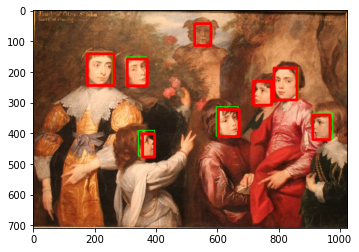

Speed: 317.9077ms
Precision: 0
Recall: 0.0
Ious: []
Positives: 0, False Positives: 0, Negatives: 1


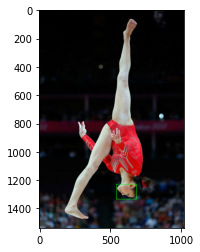

Speed: 252.804ms
Precision: 1.0
Recall: 1.0
Ious: [0.7937868237814676, 0.8975609756097561]
Positives: 2, False Positives: 0, Negatives: 0


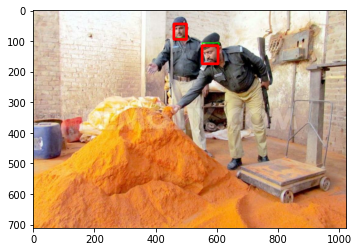

Speed: 241.6582ms
Precision: 1.0
Recall: 0.016129032258064516
Ious: [0.7126245847176079]
Positives: 1, False Positives: 0, Negatives: 61


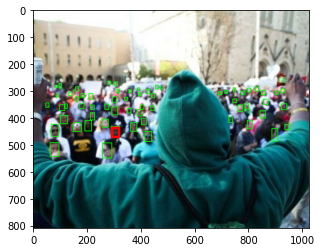

Speed: 312.3454ms
Precision: 1.0
Recall: 0.875
Ious: [0.9105431309904153, 0.8212634822804314, 0.8587786259541985, 0.7491289198606271, 0.8973252804141502, 0.8647058823529412, 0.892128279883382]
Positives: 7, False Positives: 0, Negatives: 1


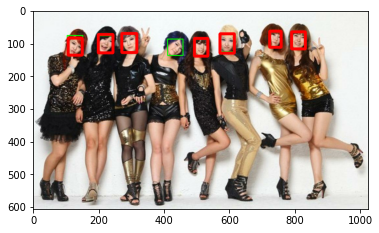

Speed: 403.5497ms
Precision: 0
Recall: 0.0
Ious: []
Positives: 0, False Positives: 0, Negatives: 9


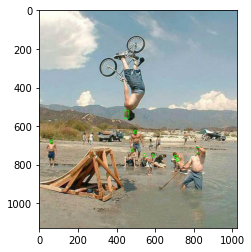

Speed: 514.925ms
Precision: 0.8571428571428571
Recall: 0.3333333333333333
Ious: [0.885685884691849, 0.5989698307579102, 0.725609756097561, 0.6199294532627866, 0.8903225806451613, 0.79296875]
Positives: 6, False Positives: 1, Negatives: 12


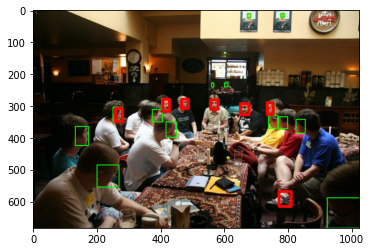

Speed: 313.9579ms
Precision: 0.8
Recall: 1.0
Ious: [0.8618358633776091, 0.8364732479276563, 0.9299516908212561, 0.4970588235294118]
Positives: 4, False Positives: 1, Negatives: 0


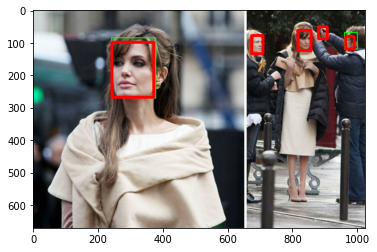

Speed: 327.013ms
Precision: 1.0
Recall: 0.19230769230769232
Ious: [0.6972405752040419, 0.8631211857018308, 0.8353909465020576, 0.8089468779123952, 0.3939393939393939]
Positives: 5, False Positives: 0, Negatives: 21


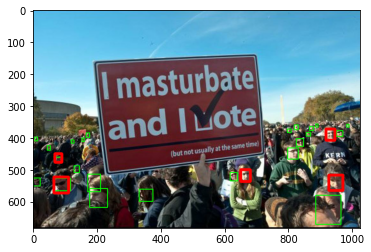

Speed: 364.2655ms
Precision: 1.0
Recall: 0.6666666666666666
Ious: [0.8521948074781691, 0.610131926121372]
Positives: 2, False Positives: 0, Negatives: 1


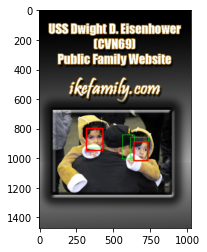

Speed: 200.8843ms
Precision: 1.0
Recall: 1.0
Ious: [0.840024706609018]
Positives: 1, False Positives: 0, Negatives: 0


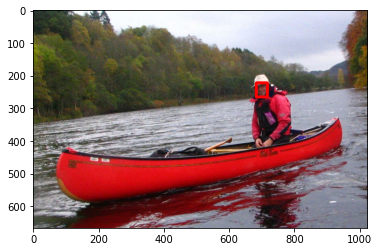

Speed: 205.0193ms
Precision: 1.0
Recall: 1.0
Ious: [0.8344539611040787]
Positives: 1, False Positives: 0, Negatives: 0


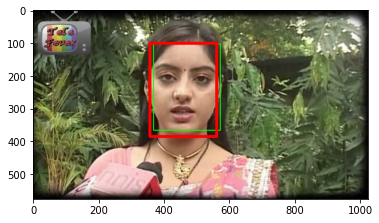

Speed: 593.8625ms
Precision: 0.5
Recall: 1.0
Ious: [0.8967991539378037]
Positives: 1, False Positives: 1, Negatives: 0


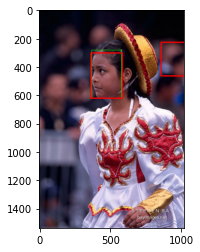

Speed: 371.9408ms
Precision: 1.0
Recall: 1.0
Ious: [0.8987908643081057, 0.867558886509636, 0.847457627118644]
Positives: 3, False Positives: 0, Negatives: 0


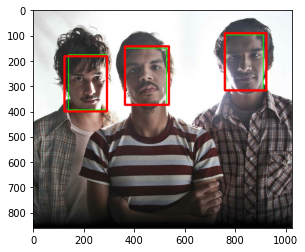

Speed: 442.9517ms
Precision: 1.0
Recall: 1.0
Ious: [0.7757728253055356]
Positives: 1, False Positives: 0, Negatives: 0


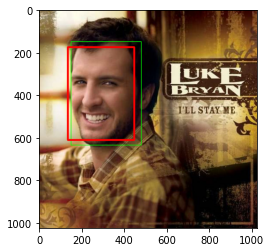

Speed: 287.617ms
Precision: 0.7142857142857143
Recall: 1.0
Ious: [0.8191580421757062, 0.9163687237680709, 0.8827226143285314, 0.8534297963558414, 0.9375968992248062]
Positives: 5, False Positives: 2, Negatives: 0


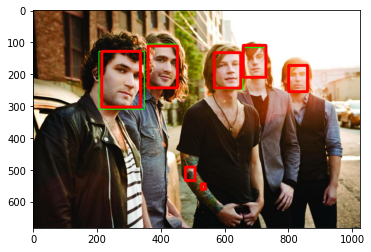

Speed: 449.9538ms
Precision: 1.0
Recall: 1.0
Ious: [0.90920115796886, 0.8385093167701864]
Positives: 2, False Positives: 0, Negatives: 0


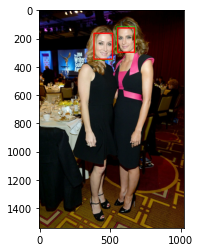

Speed: 380.4549ms
Precision: 1.0
Recall: 1.0
Ious: [0.903954802259887]
Positives: 1, False Positives: 0, Negatives: 0


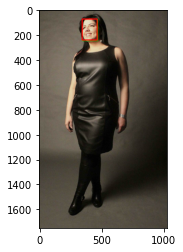

Speed: 191.8964ms
Precision: 1.0
Recall: 1.0
Ious: [0.8198818897637795]
Positives: 1, False Positives: 0, Negatives: 0


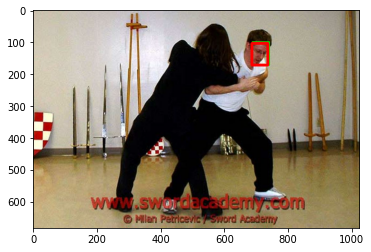

Speed: 158.5273ms
Precision: 1.0
Recall: 1.0
Ious: [0.7026694045174537, 0.6790123456790124]
Positives: 2, False Positives: 0, Negatives: 0


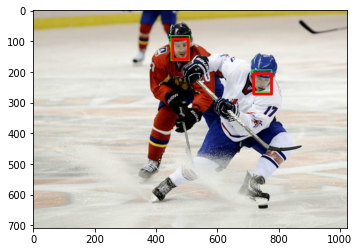

Speed: 402.9251ms
Precision: 0.5
Recall: 1.0
Ious: [0.9474201704279427]
Positives: 1, False Positives: 1, Negatives: 0


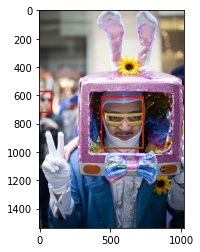

Speed: 310.1606ms
Precision: 0
Recall: 0.0
Ious: []
Positives: 0, False Positives: 0, Negatives: 1


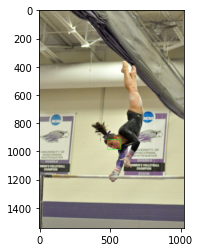

Speed: 232.698ms
Precision: 1.0
Recall: 1.0
Ious: [0.6666666666666666, 0.9116876310272537, 0.8416761780531551, 0.8302028549962435]
Positives: 4, False Positives: 0, Negatives: 0


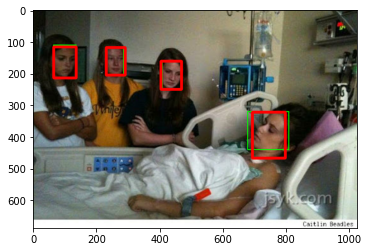

Speed: 455.8371ms
Precision: 1.0
Recall: 1.0
Ious: [0.8920128970705719]
Positives: 1, False Positives: 0, Negatives: 0


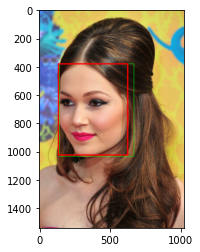

Speed: 283.7363ms
Precision: 1.0
Recall: 0.36363636363636365
Ious: [0.5241215008933889, 0.7521994134897361, 0.7940119760479042, 0.8229299363057325, 0.8336380255941499, 0.6842105263157895, 0.7096385542168675, 0.8232235701906413]
Positives: 8, False Positives: 0, Negatives: 14


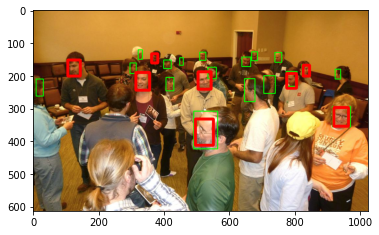

Speed: 215.5027ms
Precision: 0
Recall: 0.0
Ious: []
Positives: 0, False Positives: 0, Negatives: 1


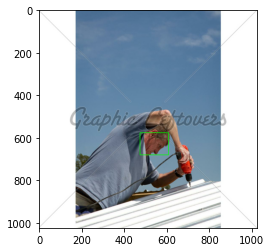

Speed: 249.5672ms
Precision: 1.0
Recall: 0.125
Ious: [0.580110497237569]
Positives: 1, False Positives: 0, Negatives: 7


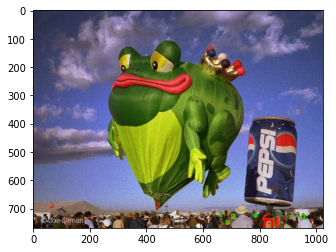

Speed: 184.8072ms
Precision: 1.0
Recall: 0.3333333333333333
Ious: [0.8689655172413793, 0.6804733727810651]
Positives: 2, False Positives: 0, Negatives: 4


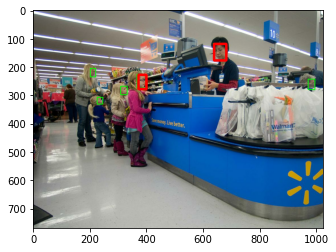

Speed: 182.0918ms
Precision: 0
Recall: 0.0
Ious: []
Positives: 0, False Positives: 0, Negatives: 1


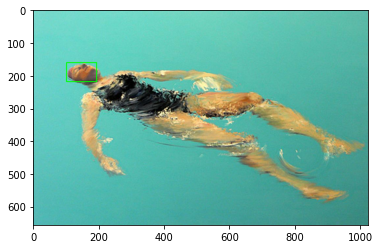

Speed: 281.965ms
Precision: 0.5
Recall: 1.0
Ious: [0.8636363636363636]
Positives: 1, False Positives: 1, Negatives: 0


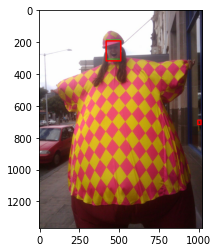

In [60]:
for sample in validation:
    image_faces = tf_to_image_faces(sample)
    img = image_faces.img
    
    for face in image_faces.faces:
        b = face.box
        cv2.rectangle(img, (b.x1, b.y1), (b.x2, b.y2), (0, 255, 0), 2)
    
    t1_start = perf_counter_ns()
    boxes, probs = mtcnn.detect(img)
    t1_stop = perf_counter_ns()
    
    boxes_preds = []
    if boxes is not None:
        for box in boxes:
            box = [int(b) for b in box]
            x1 = box[0]
            y1 = box[1]
            x2 = box[2]
            y2 = box[3]
            
            boxes_preds.append(Box(box_id = get_box_id(), x1 = x1, y1 = y1, x2 = x2, y2 = y2))
            
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 7)

    acc = image_faces.calculate_prediction(boxes_preds)
    acc.stats()
    
    pred = Prediction(t1_stop-t1_start, acc)
    print(pred.stats())
    
    plt.imshow(img)
    plt.show()